# 필요한 라이브러리 import

In [1]:
import csv
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
plt.rc('font',family='Malgun Gothic')
plt.rc('font',size=10)
warnings.filterwarnings(action='ignore')

In [2]:
# 빈 데이터 프레임 생성

fm_data_df = pd.DataFrame(columns=['이름','승','무','패','포지션','구단','리그','골/90','도움/90','경기당 팀 득점/90',
                                 '경기당 팀 실점/90', 'Cr C/A', 'FA', '반칙 수/90', '기회 창출/90',
                                 '경기당 유효 슈팅/90', '경기당 슈팅/90', 'Int/90', '달린 거리/90분', 
                                 '공중 A/90', '태클 성공률','경기당 패스 시도/90', '경기당 패스 성공/90', 
                                 'K Ps/90', '태클 성공/90', '드리블 성공/90', 
                                 '헤더 성공/90', 'Cr A/90', '평균획득승점/경기'])

# 모든 데이터 프레임 이어붙이기
fm_data_df = pd.concat([fm_data_df,pd.read_csv('./datas/NEW_FM_DATA_FOR_ML/2021-2022/2021-2022ML.csv',encoding='utf-8-sig')])
fm_data_df = fm_data_df.reset_index(drop=True)

# 데이터 프레임 컬럼명 변경 및 자료형 변경
fm_data_df.rename(columns={'Cr C/A':'크로스 성공률','FA':'파울 획득','Int/90':'인터셉트/90','공중 A/90':'공중볼시도/90','K Ps/90':'키패스/90','Cr A/90':'크로스 시도/90'},inplace=True)
fm_data_df = fm_data_df.astype({'파울 획득':np.int64,'태클 성공률':np.int64})

# 공격수만 추출
pl_df = fm_data_df.query("리그 == '잉글랜드 프리미어 리그'")
pl_df = pl_df.reset_index(drop=True)

# 팀별 포지션별 패스 유형 분석

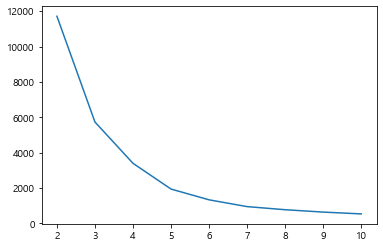

In [3]:
inertia_list = []

for i in range(2,11):
    model = KMeans(n_clusters=i,random_state=123).fit(pl_df[['경기당 패스 시도/90','경기당 패스 성공/90']])
    inertia_list.append(model.inertia_)

plt.plot(np.arange(2,11),inertia_list)
plt.show()

In [4]:
pass_kmeans_model = KMeans(n_clusters=3,random_state=123).fit(pl_df[['경기당 패스 시도/90','경기당 패스 성공/90']])

In [5]:
pl_df['패스군집'] = pass_kmeans_model.labels_

In [6]:
pl_df['패스군집'] = pl_df['패스군집'].map(lambda x :'일반패스군' if x == 0 else '안전패스군' if x == 1 else '위험패스군')

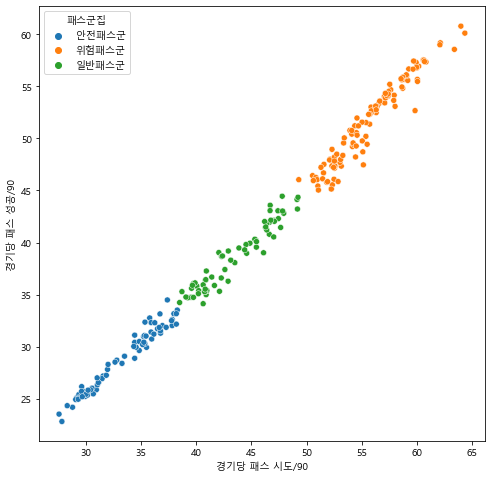

In [7]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='경기당 패스 시도/90',y='경기당 패스 성공/90',data=pl_df,hue='패스군집')
plt.show()

In [8]:
def draw_pie_chart(position,feature):
    
    
    groups = pl_df[pl_df['포지션']==position][f'{feature}군집'].unique()

    fig,axes = plt.subplots(1,len(groups),figsize=(20,10))
    
    for i,(ax,group) in enumerate(zip(axes.ravel(),groups)):
        
        forward_group = pl_df.query(f"{feature}군집=='{group}' and 포지션=='{position}'").groupby(pl_df['구단']).count()['시즌'].sort_values(ascending=False).head(8)

        ax.pie(forward_group,labels=tuple(zip(forward_group.index,forward_group.values)),autopct='%.1f%%',)
        ax.set_title(position+' '+group)

    plt.show()

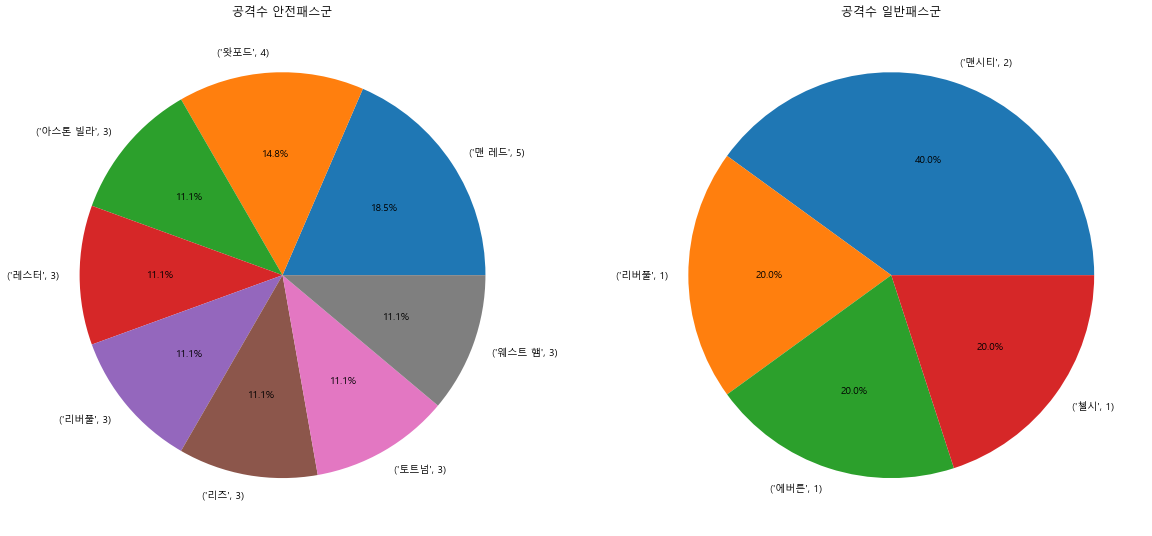

In [9]:
draw_pie_chart('공격수','패스')

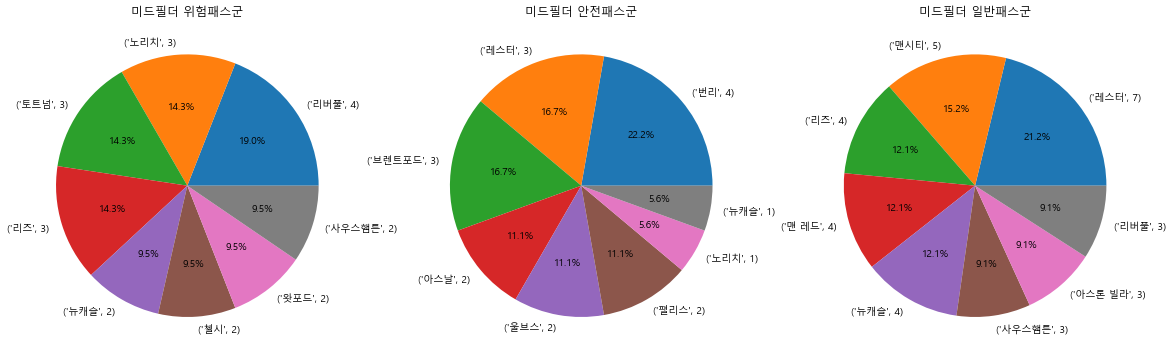

In [10]:
draw_pie_chart('미드필더','패스')

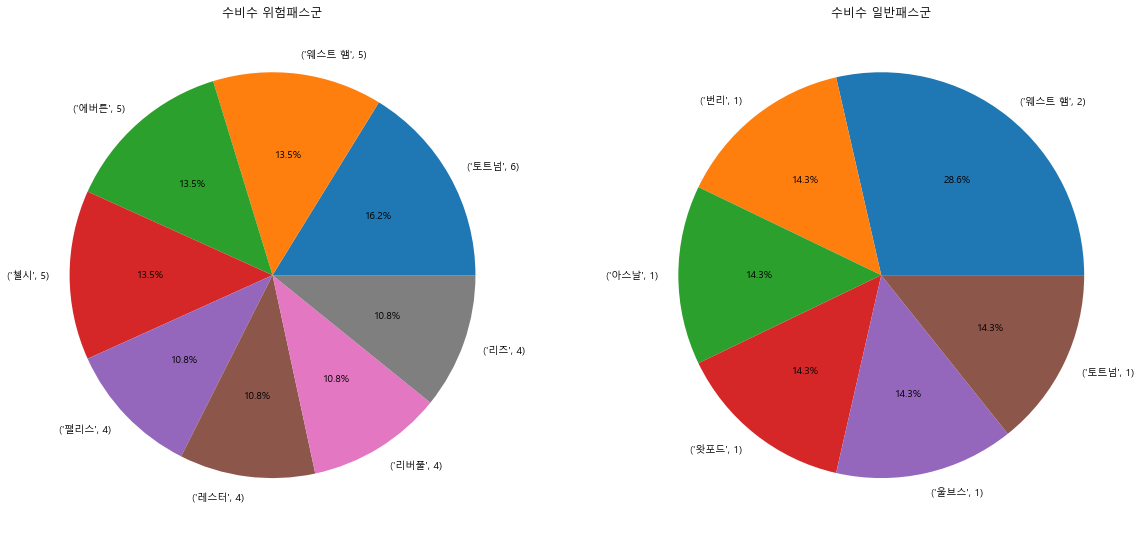

In [11]:
draw_pie_chart('수비수','패스')

# 팀 별 달린거리 분석

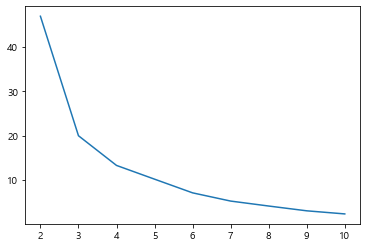

In [12]:
inertia_list = []

for i in range(2,11):
    model = KMeans(n_clusters=i,random_state=123).fit(pl_df['달린 거리/90분'].values.reshape(-1,1))
    inertia_list.append(model.inertia_)

plt.plot(np.arange(2,11),inertia_list)
plt.show()

In [13]:
run_kmeans_model = KMeans(n_clusters=3,random_state=123).fit(pl_df['달린 거리/90분'].values.reshape(-1,1))

In [14]:
pl_df['달린거리군집'] = run_kmeans_model.labels_

In [15]:
pl_df['달린거리군집'] = pl_df['달린거리군집'].map(lambda x :'적은활동군' if x == 0 else '일반활동군' if x == 1 else '활발활동군')

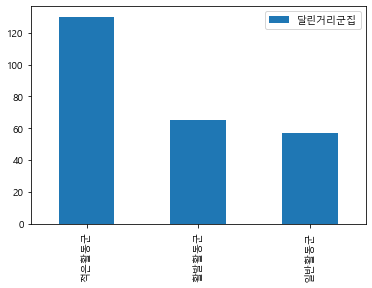

In [16]:
pl_df['달린거리군집'].value_counts().to_frame().plot.bar();

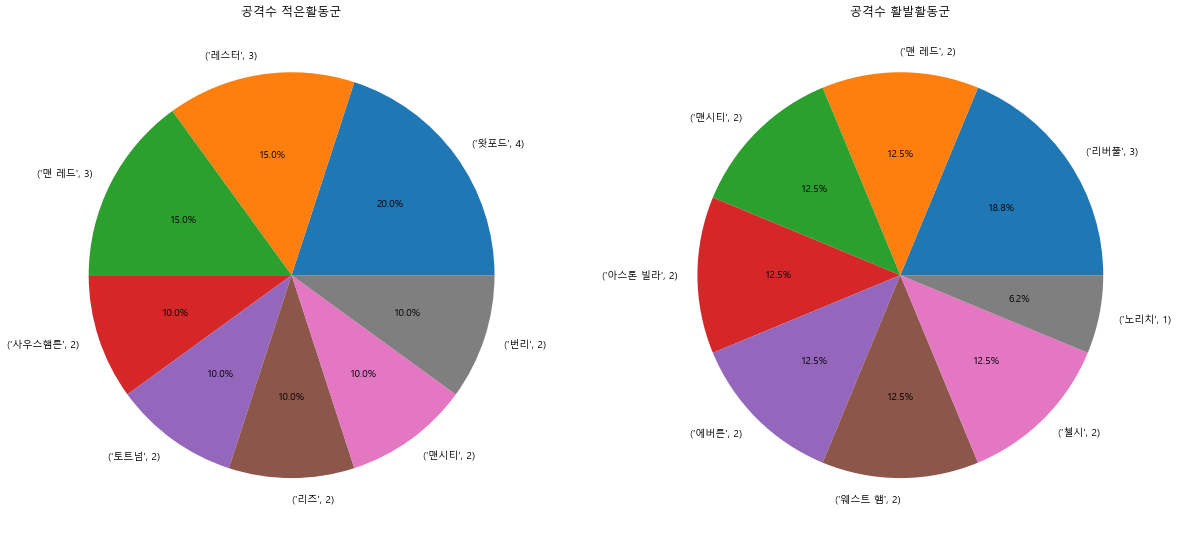

In [17]:
draw_pie_chart('공격수','달린거리')

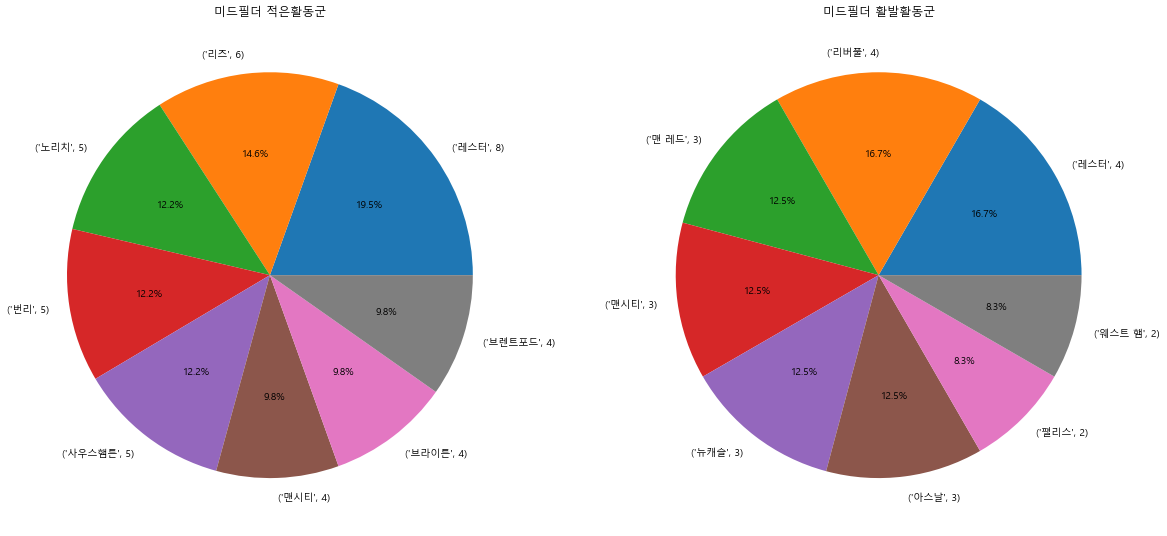

In [18]:
draw_pie_chart('미드필더','달린거리')

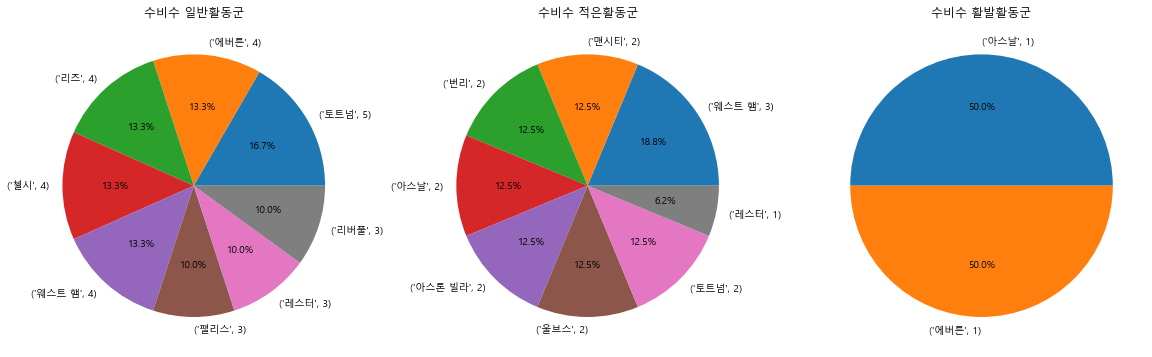

In [19]:
draw_pie_chart('수비수','달린거리')